In [ ]:
import json
import nltk
import pandas as pd
import operator
import gensim
from gensim import corpora
from gensim.models import LdaModel
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
nltk.download("stopwords")
nltk.download('wordnet')
from nltk.corpus import stopwords 
import gzip
import bz2
import csv
import glob
from datetime import datetime
import os
import zipfile
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
os.getcwd()
#os.chdir('/')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jasim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jasim\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'C:\\Users\\jasim\\Desktop\\latestfolder\\DataVisulization\\PredictiveAnalyticsProject'

In [ ]:
df=pd.read_csv('preprocessing_project_data_w.csv')

In [ ]:
df.isnull().sum()

Title              0
Target             0
Conditions         0
Interventions      0
OutcomeMeasures    0
Sponsor            0
Gender             0
Enrollment         0
FundedBys          0
StudyType          0
StudyDesign        0
dtype: int64

In [ ]:
df = df[df['Title'].notnull()]
tokenizer = RegexpTokenizer(r'\w+')
doc_1 = df.Title[34]


In [ ]:
tokens = tokenizer.tokenize(doc_1.lower())
nltk_stpwd = stopwords.words('english')
#customise_stop_Words = ['is','the']
#nltk_stpwd.extend(customise_stop_Words)
#print(len(set(nltk_stpwd)))
#print(nltk_stpwd[:10])

stopped_tokens = [token for token in tokens if not token in nltk_stpwd]
#print(stopped_tokens[:1])

In [ ]:
lemmatizer = WordNetLemmatizer()
Lemmatizer_tokens = [lemmatizer.lemmatize(token) for token in stopped_tokens]
print(Lemmatizer_tokens)
num_reviews = df.shape[0]

['diagnosis', 'short', 'stature', 'child', 'study', 'cohort', 'small', 'sized', 'consulting', 'patient']


In [ ]:
doc_set = [df.Title[i] for i in range(len(df))]
texts = []

for doc in doc_set:
    tokens = tokenizer.tokenize(doc.lower())
    stopped_tokens = [token for token in tokens if not token in nltk_stpwd]
    Lemmatizer_tokens = [lemmatizer.lemmatize(token) for token in stopped_tokens]
    texts.append(Lemmatizer_tokens )

In [ ]:
texts_dict = corpora.Dictionary(texts)
texts_dict.save('clinical_triaal.dict_2') 
print(texts_dict)

Dictionary(19905 unique tokens: ['addition', 'behavioral', 'compassion', 'conferencing', 'delivered']...)


In [ ]:
texts_dict.filter_extremes(no_below=20, no_above=0.10) 
#print(sorted(texts_dict.token2id.items(), key=operator.itemgetter(1), reverse = False)[:100])

In [ ]:
# Converting the dictionary to bag of words
corpus = [texts_dict.doc2bow(text) for text in texts]

In [ ]:
len(corpus)

20000

In [ ]:
gensim.corpora.MmCorpus.serialize('cliical_trial.mm', corpus)

In [ ]:
#LDA model by using gensim
lda_model = gensim.models.LdaModel(corpus,alpha='auto', num_topics=30,id2word=texts_dict, passes=20)
#print the topics
lda_model.print_topics()

[(11,
  '0.133*"impact" + 0.083*"quality" + 0.077*"life" + 0.057*"prospective" + 0.049*"observational" + 0.034*"rate" + 0.031*"hormone" + 0.030*"inflammation" + 0.028*"exposure" + 0.027*"daily"'),
 (13,
  '0.230*"chronic" + 0.082*"pulmonary" + 0.057*"disease" + 0.057*"hypertension" + 0.055*"kidney" + 0.034*"lower" + 0.027*"testing" + 0.026*"oxygen" + 0.024*"treatment" + 0.024*"steroid"'),
 (7,
  '0.123*"covid" + 0.123*"19" + 0.099*"multiple" + 0.093*"infection" + 0.052*"bone" + 0.043*"sclerosis" + 0.041*"hepatitis" + 0.039*"respiratory" + 0.030*"marker" + 0.028*"virus"'),
 (29,
  '0.124*"healthy" + 0.110*"ass" + 0.083*"primary" + 0.063*"volunteer" + 0.058*"functional" + 0.044*"vaccine" + 0.037*"magnetic" + 0.035*"food" + 0.031*"maintenance" + 0.027*"determine"'),
 (27,
  '0.093*"stage" + 0.077*"prostate" + 0.070*"health" + 0.067*"cancer" + 0.057*"iv" + 0.052*"infant" + 0.046*"total" + 0.045*"tissue" + 0.040*"hip" + 0.027*"arthroplasty"'),
 (16,
  '0.071*"drug" + 0.064*"positive" + 0.04

In [ ]:
word_dict = {};
num_topics_1=30
for i in range(num_topics_1):
    words = lda_model.show_topic(i, topn = 15)
    word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words]
pd.DataFrame(word_dict)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10,...,Topic # 21,Topic # 22,Topic # 23,Topic # 24,Topic # 25,Topic # 26,Topic # 27,Topic # 28,Topic # 29,Topic # 30
0,high,metastatic,blood,brain,cell,use,subject,covid,non,adult,...,using,child,dose,v,safety,plus,refractory,stage,radiation,healthy
1,syndrome,2,term,human,pediatric,treatment,exercise,19,lung,early,...,heart,pain,acute,open,efficacy,assessment,ii,prostate,cardiac,ass
2,response,type,outcome,activity,transplant,management,woman,multiple,oral,year,...,failure,based,participant,cancer,evaluate,imaging,stimulation,health,surgery,primary
3,risk,diabetes,long,physical,liver,following,prevention,infection,cell,people,...,device,effectiveness,pilot,label,tolerability,related,evaluating,cancer,feasibility,volunteer
4,analysis,surgery,pressure,dos,stem,injection,training,bone,cancer,older,...,treat,low,single,without,subject,recurrent,resistant,iv,malignancy,functional
5,fracture,block,sleep,skin,transplantation,b,induced,sclerosis,relapsed,continuous,...,anti,level,leukemia,pancreatic,pharmacokinetics,pet,treatment,infant,protocol,vaccine
6,ovarian,control,arthritis,time,combined,surgical,body,hepatitis,small,glucose,...,extension,rehabilitation,healthy,depression,treating,vitamin,alzheimer,total,laparoscopic,magnetic
7,metastasis,colorectal,registry,improve,undergoing,knee,healthy,respiratory,lymphoma,short,...,self,reduction,myeloid,gastric,severe,ct,copd,tissue,infusion,food
8,diagnosed,mellitus,diabetic,pk,factor,pain,change,marker,new,r,...,peripheral,among,implant,artery,treatment,inhibitor,nsclc,hip,graft,maintenance
9,treatment,receptor,wound,hospital,pre,spinal,male,virus,administration,anterior,...,therapeutic,therapy,autologous,resection,moderate,age,cerebral,arthroplasty,repair,determine


In [ ]:
topics=pd.DataFrame(word_dict)
topics.to_csv('clinical_trial_topic_30.csv')

In [ ]:
lda_model.show_topic(19)

[('cancer', 0.1774997),
 ('versus', 0.14802231),
 ('breast', 0.09649524),
 ('carcinoma', 0.05263768),
 ('placebo', 0.050734457),
 ('treatment', 0.04119388),
 ('comparing', 0.038123973),
 ('3', 0.029833404),
 ('radiotherapy', 0.028198315),
 ('double', 0.024432186)]

In [ ]:
for topic_id in range(lda_model.num_topics):
    topk = lda_model.show_topic(topic_id, 10)
    topk_words = [ w for w, _ in topk ]
    
    print('{}: {}'.format(topic_id, ' '.join(topk_words)))

0: high syndrome response risk analysis fracture ovarian metastasis diagnosed treatment
1: metastatic 2 type diabetes surgery block control colorectal mellitus receptor
2: blood term outcome long pressure sleep arthritis registry diabetic wound
3: brain human activity physical dos skin time improve pk hospital
4: cell pediatric transplant liver stem transplantation combined undergoing factor pre
5: use treatment management following injection b surgical knee pain spinal
6: subject exercise woman prevention training induced body healthy change male
7: covid 19 multiple infection bone sclerosis hepatitis respiratory marker virus
8: non lung oral cell cancer relapsed small lymphoma new administration
9: adult early year people older continuous glucose short r anterior
10: phase post 1 c 2 subject weight operative schizophrenia comparative
11: impact quality life prospective observational rate hormone inflammation exposure daily
12: trial clinical randomized controlled paclitaxel reduce ab

In [ ]:
vectorizer = CountVectorizer(min_df=5,stop_words='english')
vec_text = vectorizer.fit_transform(df['Title'])
lda = LatentDirichletAllocation(n_components=30, random_state=0)
topics = lda.fit_transform(vec_text)

In [ ]:
topic_df = pd.DataFrame(data=topics)
topic_df.columns = [ 'Topic_' + str(col) for col in topic_df.columns]


In [ ]:
print(topic_df.head())

    Topic_0   Topic_1   Topic_2   Topic_3   Topic_4   Topic_5   Topic_6  \
0  0.002381  0.099585  0.002381  0.002381  0.002381  0.002381  0.002381   
1  0.006667  0.255425  0.006667  0.006667  0.006667  0.006667  0.006667   
2  0.005556  0.005556  0.005556  0.005556  0.005556  0.005556  0.005556   
3  0.006667  0.006667  0.006667  0.006667  0.006667  0.006667  0.006667   
4  0.011111  0.011111  0.011111  0.011111  0.011111  0.011111  0.351055   

    Topic_7   Topic_8   Topic_9  ...  Topic_20  Topic_21  Topic_22  Topic_23  \
0  0.002381  0.002381  0.002381  ...  0.002381  0.002381  0.472481  0.002381   
1  0.006667  0.006667  0.006667  ...  0.006667  0.006667  0.006667  0.557908   
2  0.005556  0.469243  0.005556  ...  0.005556  0.005556  0.005556  0.005556   
3  0.006667  0.006667  0.006667  ...  0.206667  0.006667  0.006667  0.006667   
4  0.011111  0.011111  0.011111  ...  0.011111  0.011111  0.011111  0.011111   

   Topic_24  Topic_25  Topic_26  Topic_27  Topic_28  Topic_29  
0  0

In [ ]:
def plot_top_words(model, feature_names, n_top_words):
    fig, axes = plt.subplots(5,6, figsize=(30,40), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle("Top words", fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

In [ ]:
def plot_feature_importance(model, df):
    mpl.rcParams['figure.figsize'] = (10, 8)
    df.sort_values('Feature_importance', inplace=True, ascending = False) 
    df.reset_index(inplace=True)
    df=df.head(20)
    plt.grid(linestyle='--', alpha=0.5)
    plt.xlabel("Features", fontsize=12)
    plt.xticks(rotation=90)
    plt.ylabel("Feature Importance", fontsize=12)
    plt.bar(df['Feature_label'], df['Feature_importance'], width= 0.4, color= 'orange', alpha= 0.8, edgecolor='grey')
    plt.title("Feature importances (top20 features) for model with {} trees".format(model.n_estimators), fontsize=14)
    plt.show()

In [ ]:
feature_names = vectorizer.get_feature_names()
print(feature_names)

['001', '002', '003', '004', '005', '007', '01', '010', '02', '024', '03', '044', '05', '06651600', '10', '100', '101', '102', '104', '11', '110', '11c', '12', '13', '14', '142', '14c', '15', '16', '17', '18', '18f', '19', '1a', '1b', '1st', '20', '200', '2016', '2019', '2020', '223', '23', '24', '25', '28', '2a', '2b', '2nd', '30', '302', '3475', '36', '37', '3d', '3rd', '40', '400', '48', '50', '500', '501', '520', '60', '600', '64', '64417184', '65', '68ga', '70', '75', '80', '875', '90', '986165', '99mtc', 'ab', 'abbv', 'abdominal', 'abdominis', 'abi', 'ability', 'abiraterone', 'ablation', 'ablative', 'abnormal', 'abnormalities', 'abortion', 'abraxane', 'absence', 'absolute', 'absorbs', 'absorption', 'abstinence', 'abt', 'abuse', 'abutment', 'academic', 'acalabrutinib', 'accelerated', 'acceptability', 'acceptance', 'access', 'according', 'accuracy', 'ace', 'acetabular', 'acetaminophen', 'acetate', 'acetyl', 'acetylcysteine', 'achilles', 'acid', 'acids', 'acl', 'acne', 'acoustic', '

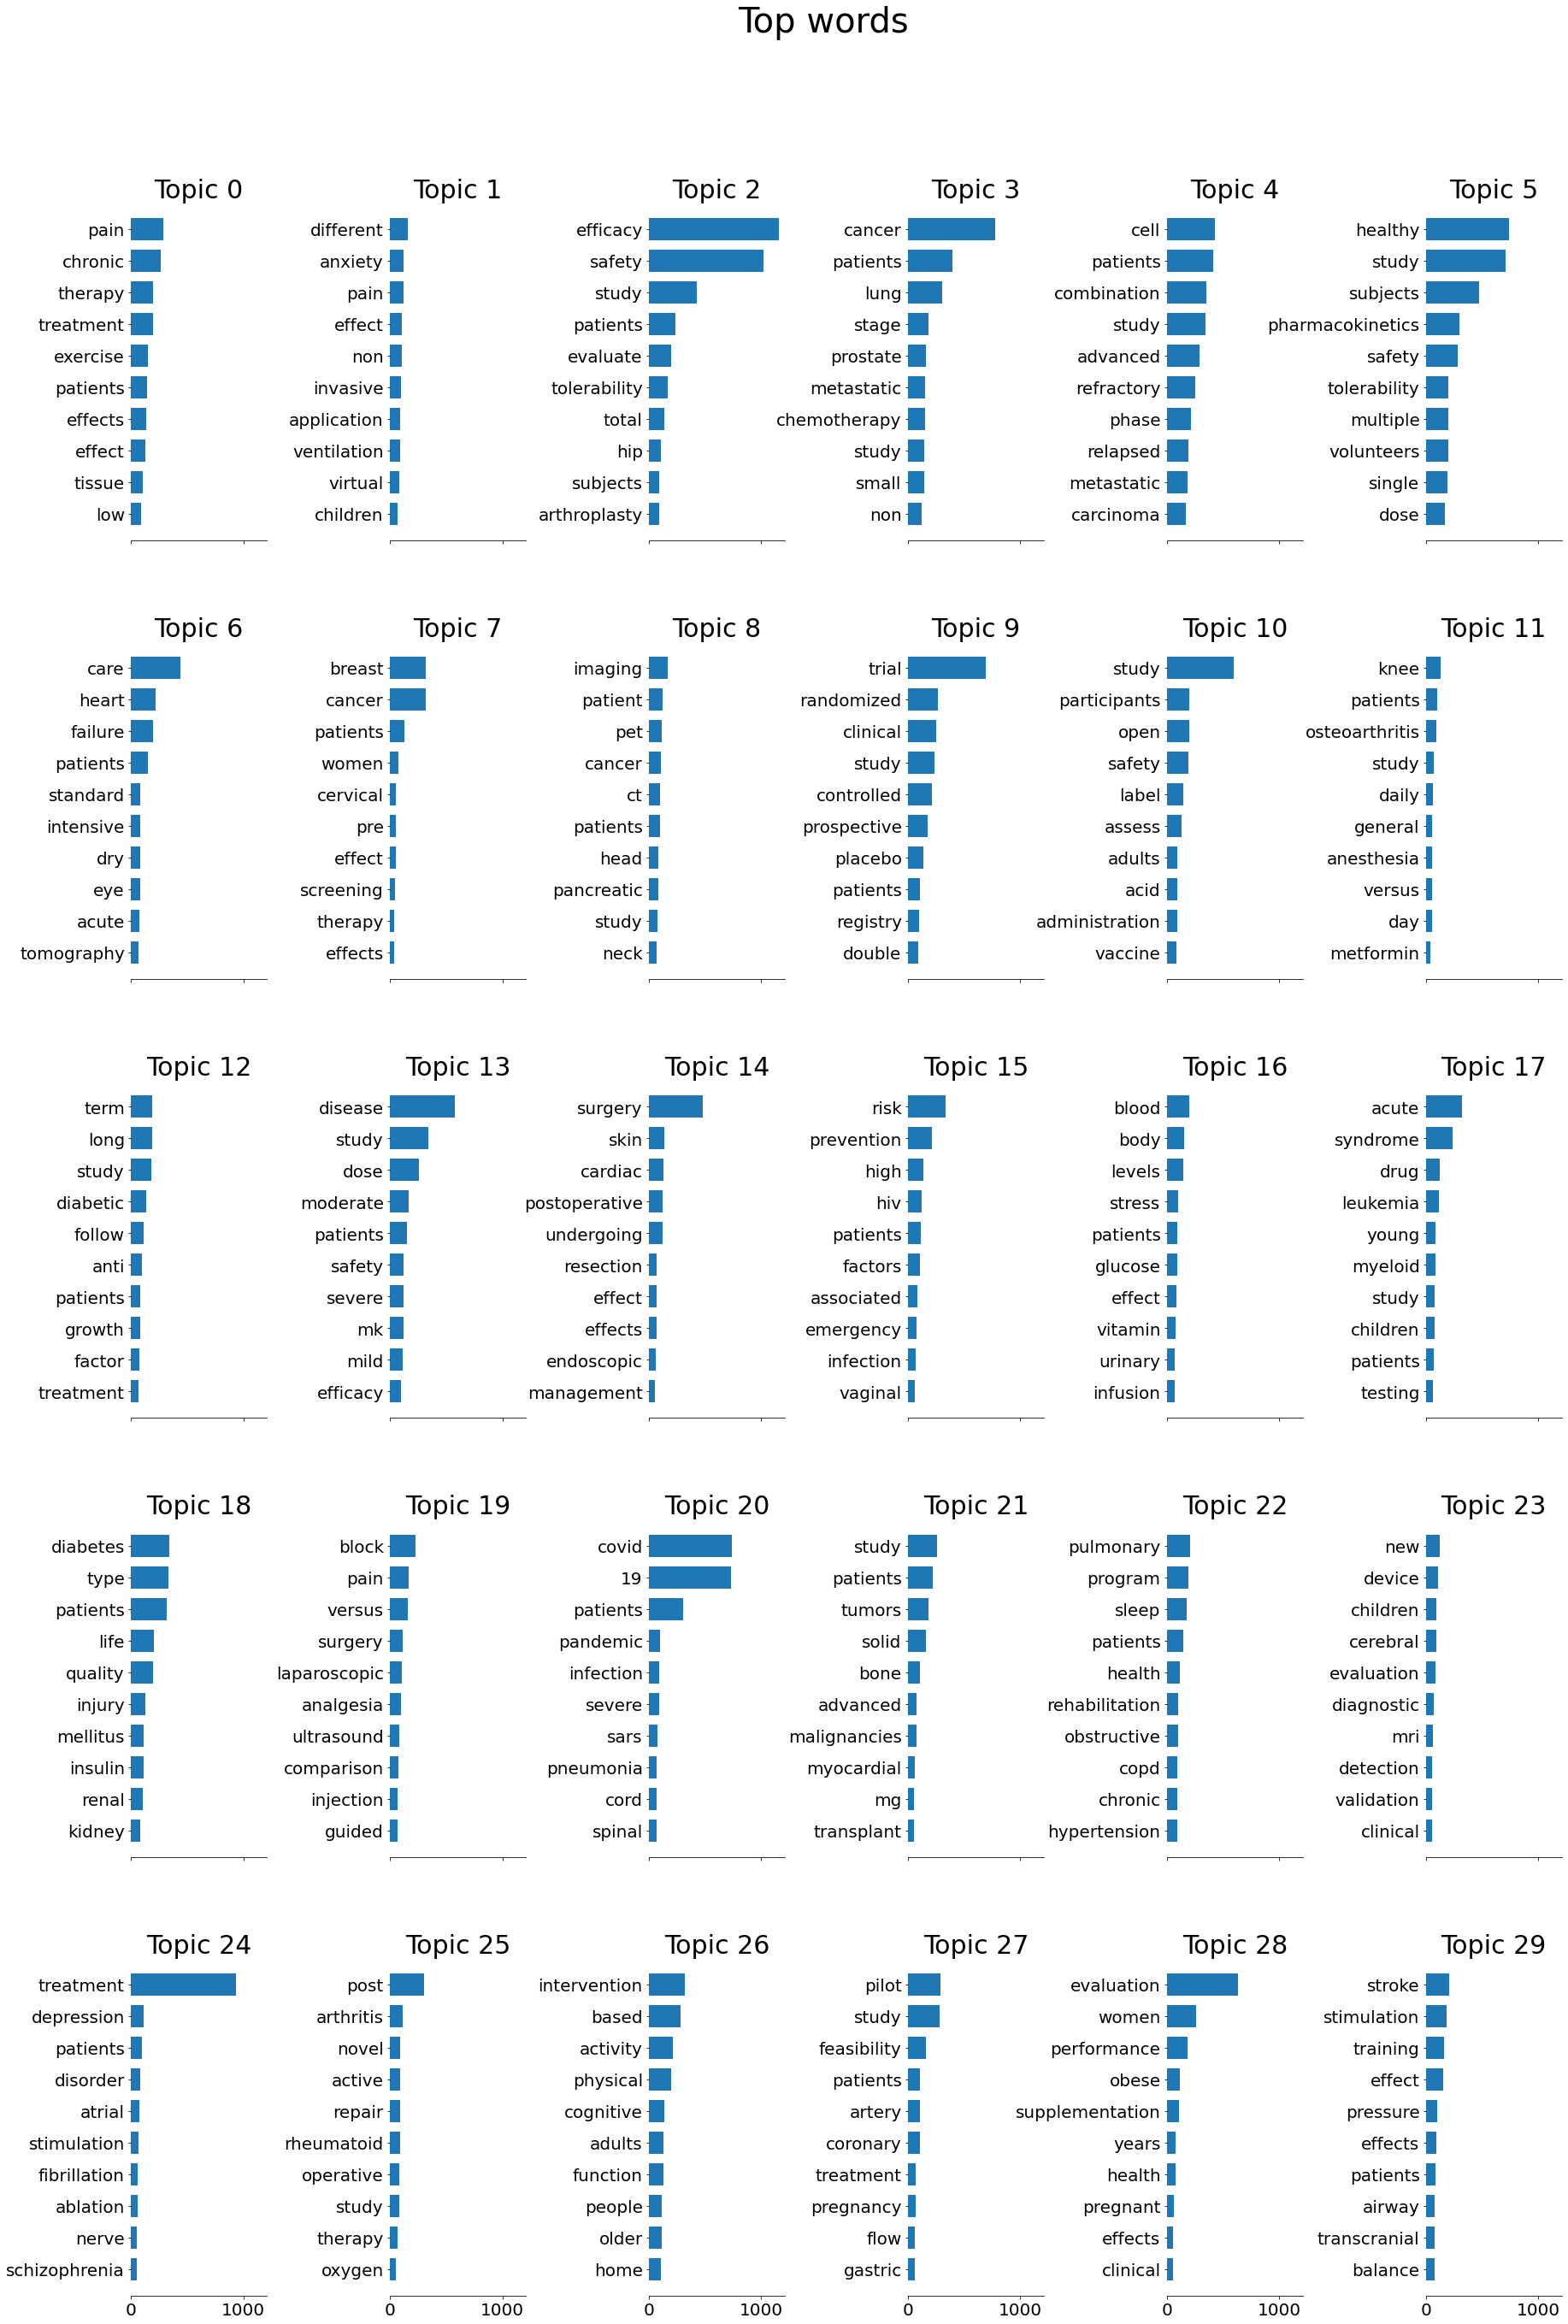

In [ ]:
plot_top_words(lda, feature_names, 10)

In [ ]:
df2=pd.read_csv('preprocess_bow_encoded_data.csv')

In [ ]:
df2.head()

,Target,Enrollment,Gender,StudyType,FundedBys_Others,FundedBys_Industries,FundedBys_NIH,FundedBys_USA_FED,StudyDesign1,StudyDesign2,...,StudyDesign47,StudyDesign48,StudyDesign49,StudyDesign50,StudyDesign51,StudyDesign52,StudyDesign53,StudyDesign54,StudyDesign55,StudyDesign56
0,0,54.0,0,0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,358.0,0,1,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,30.0,1,1,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,69.0,0,1,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,124.0,1,0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
topic_df.head()

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,...,Topic_20,Topic_21,Topic_22,Topic_23,Topic_24,Topic_25,Topic_26,Topic_27,Topic_28,Topic_29
0,0.002381,0.099585,0.002381,0.002381,0.002381,0.002381,0.002381,0.002381,0.002381,0.002381,...,0.002381,0.002381,0.472481,0.002381,0.002381,0.002381,0.002381,0.002381,0.002381,0.239730
1,0.006667,0.255425,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,...,0.006667,0.006667,0.006667,0.557908,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667
2,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.469243,0.005556,...,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556
3,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,...,0.206667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667
4,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.351055,0.011111,0.011111,0.011111,...,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111


In [ ]:
df_col = pd.concat([df2,topic_df], axis=1)

In [ ]:
df_col.head()

,Target,Enrollment,Gender,StudyType,FundedBys_Others,FundedBys_Industries,FundedBys_NIH,FundedBys_USA_FED,StudyDesign1,StudyDesign2,...,Topic_20,Topic_21,Topic_22,Topic_23,Topic_24,Topic_25,Topic_26,Topic_27,Topic_28,Topic_29
0,0,54.0,0,0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.002381,0.002381,0.472481,0.002381,0.002381,0.002381,0.002381,0.002381,0.002381,0.239730
1,0,358.0,0,1,1.0,0.0,0.0,0.0,1.0,0.0,...,0.006667,0.006667,0.006667,0.557908,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667
2,0,30.0,1,1,1.0,0.0,0.0,0.0,1.0,0.0,...,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556
3,0,69.0,0,1,1.0,0.0,0.0,0.0,1.0,0.0,...,0.206667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667
4,0,124.0,1,0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111


In [ ]:
df_shuffle = df_col.sample(frac = 1) 

In [ ]:
df_shuffle.head()

,Target,Enrollment,Gender,StudyType,FundedBys_Others,FundedBys_Industries,FundedBys_NIH,FundedBys_USA_FED,StudyDesign1,StudyDesign2,...,Topic_20,Topic_21,Topic_22,Topic_23,Topic_24,Topic_25,Topic_26,Topic_27,Topic_28,Topic_29
727,0,60.0,0,1,1.0,0.0,0.0,0.0,1.0,0.0,...,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.317991,0.004167,0.004167,0.004167
12704,1,1.0,0,0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.004762,0.004762,0.004762,0.004762,0.106669,0.004762,0.004762,0.004762,0.004762,0.004762
10724,1,6.0,0,1,0.0,1.0,0.0,0.0,1.0,0.0,...,0.003333,0.003333,0.003333,0.313479,0.003333,0.151471,0.003333,0.003333,0.003333,0.003333
2354,0,50.0,0,0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167
7031,0,120.0,0,0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.001754,0.001754,0.001754,0.001754,0.001754,0.281181,0.001754,0.001754,0.001754,0.001754


In [ ]:
df_shuffle=df_shuffle.reset_index(drop=True)